In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import numpy as np
from datetime import timedelta

In [75]:
data_url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/957982/COVID-19-transport-use-statistics.ods'

# odfpy required
df = pd.read_excel(data_url, engine='odf', header=6)
df

,Date1(weekends and bank holidays in grey),Cars2,Light Commercial Vehicles2,Heavy Goods Vehicles2,All motor vehicles2,"National Rail3,4",Transport for London Tube5,"Transport for London Bus5,7","Bus (excl. London)6,8,9","Cycling10,11"
0,2020-03-01 00:00:00,1.03,1.11,1.08,1.04,0.97,1.04,1.02,..,..
1,2020-03-02 00:00:00,1.02,1.06,1.03,1.03,0.94,0.95,0.97,..,..
2,2020-03-03 00:00:00,1.01,1.05,1.02,1.02,0.95,0.95,0.96,..,..
3,2020-03-04 00:00:00,1.01,1.04,1.03,1.01,0.95,0.95,0.97,..,..
4,2020-03-05 00:00:00,1.00,1.03,1.02,1.00,0.97,0.92,0.92,..,..
...,...,...,...,...,...,...,...,...,...,...
384,Transport for London Tube and Bus,NaN,NaN,cm.analytics@dft.gov.uk,NaN,NaN,NaN,NaN,NaN,NaN
385,Buses (excl. London),NaN,NaN,bus.statistics@dft.gov.uk,NaN,020 7944 3077,NaN,NaN,NaN,NaN
386,Cycling,NaN,NaN,subnational.stats@dft.gov.uk,NaN,020 7944 3077,NaN,NaN,NaN,NaN
387,Any other queries,NaN,NaN,transport.statistics@dft.gov.uk,NaN,020 7944 4847,NaN,NaN,NaN,NaN


In [76]:
df = df.dropna()
df = df.iloc[:, [0, 6]]
df

,Date1(weekends and bank holidays in grey),Transport for London Tube5
0,2020-03-01 00:00:00,1.04
1,2020-03-02 00:00:00,0.95
2,2020-03-03 00:00:00,0.95
3,2020-03-04 00:00:00,0.95
4,2020-03-05 00:00:00,0.92
...,...,...
340,2021-02-04 00:00:00,0.16
341,2021-02-05 00:00:00,0.17
342,2021-02-06 00:00:00,0.15
343,2021-02-07 00:00:00,0.18


In [77]:
df.columns = ['date', 'tube']
df.date = pd.to_datetime(df.date)
df.tube = pd.to_numeric(df.tube, errors='coerce')
df.tube = df.tube * 100
df = df.dropna().copy()
df

,date,tube
0,2020-03-01,104.0
1,2020-03-02,95.0
2,2020-03-03,95.0
3,2020-03-04,95.0
4,2020-03-05,92.0
...,...,...
340,2021-02-04,16.0
341,2021-02-05,17.0
342,2021-02-06,15.0
343,2021-02-07,18.0


In [78]:
# Simple moving average 
# Default rolling result is set to right edge of window,
# unless you set center=True
df['sma'] = df.rolling(7, center=True).mean()
df

,date,tube,sma
0,2020-03-01,104.0,NaN
1,2020-03-02,95.0,NaN
2,2020-03-03,95.0,NaN
3,2020-03-04,95.0,94.857143
4,2020-03-05,92.0,92.428571
...,...,...,...
340,2021-02-04,16.0,16.714286
341,2021-02-05,17.0,16.714286
342,2021-02-06,15.0,NaN
343,2021-02-07,18.0,NaN


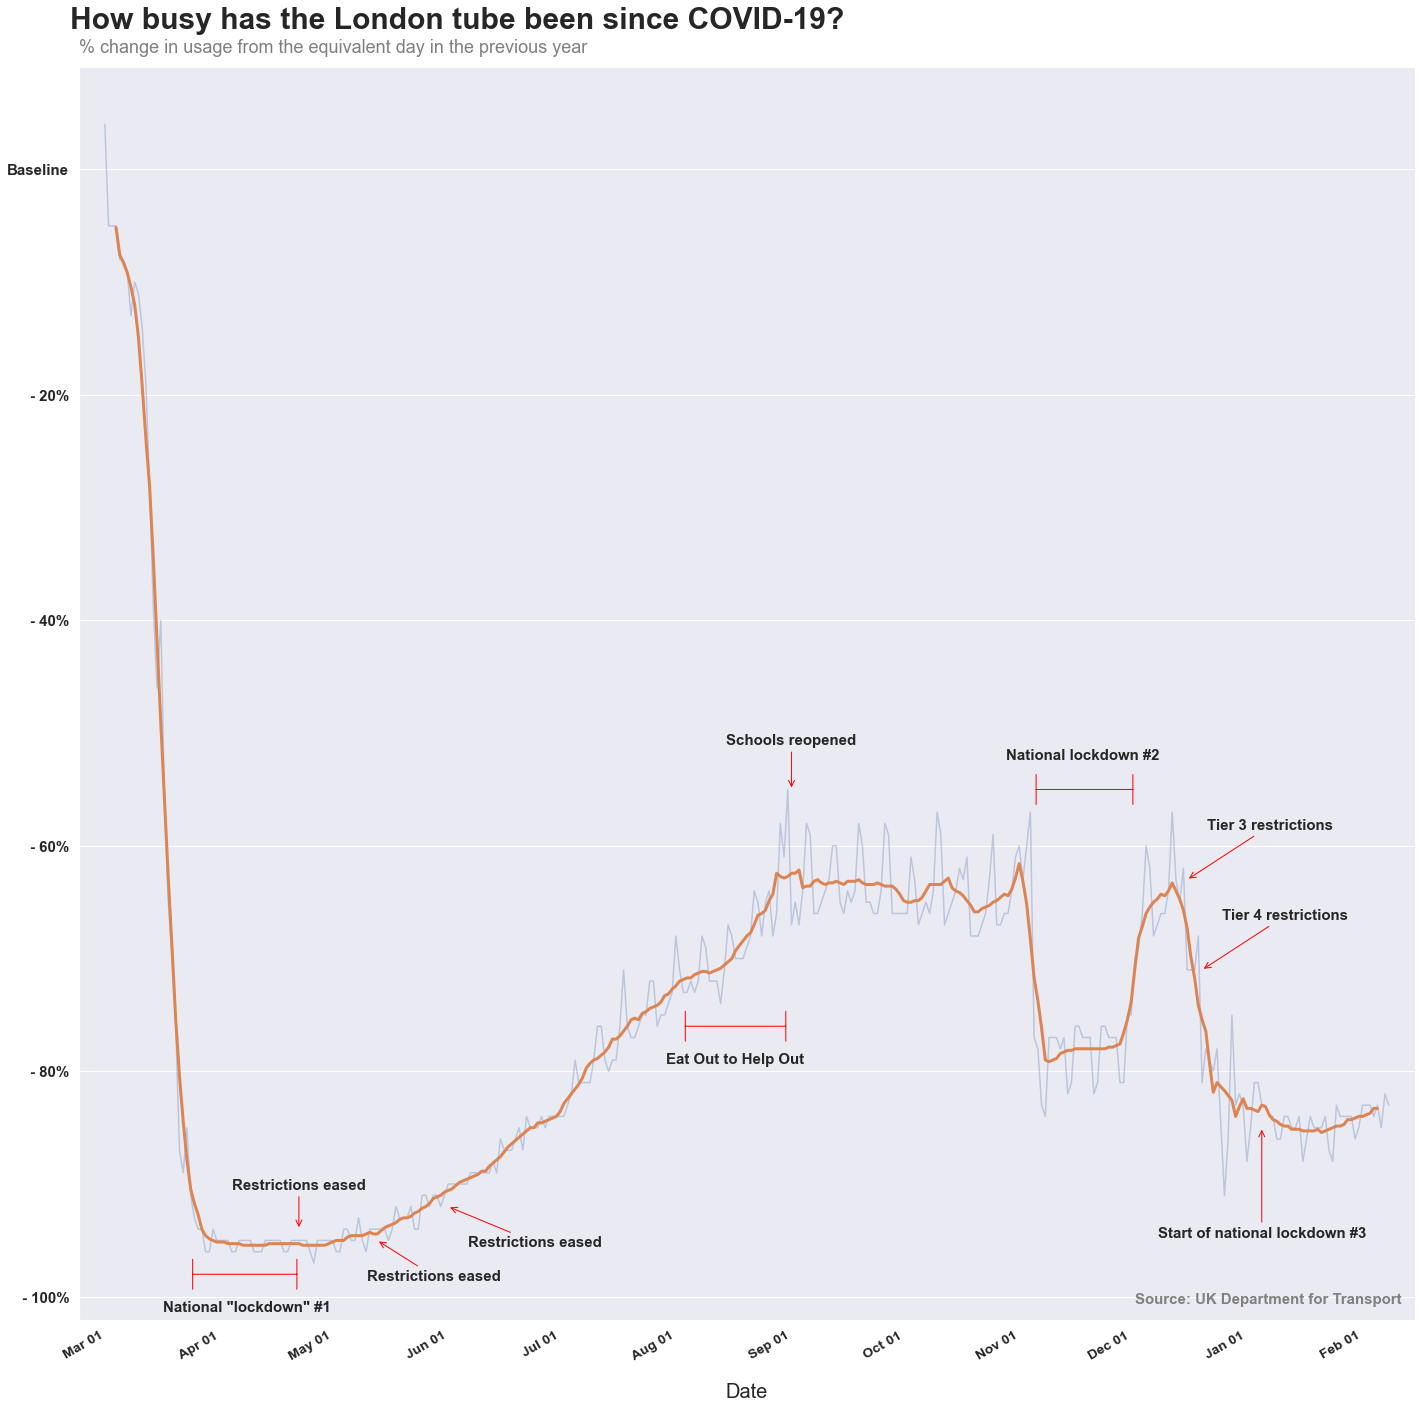

In [80]:
sns.set_theme(font='Arial', font_scale=1.25)

fig, ax = plt.subplots(figsize=(20, 20))

rcParams['figure.titlesize'] = 30
rcParams['figure.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['axes.titlepad'] = 15
rcParams['font.weight'] = 'bold'


sns.lineplot(data=df, x='date', y='tube', ax=ax, alpha=0.3)
sns.lineplot(data=df, x='date', y='sma', ax=ax, linewidth=3)

ax.set_xlabel('Date', labelpad=20, fontsize=20)
ax.set_ylabel('')

date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim(df.date.iloc[0] - timedelta(days=7), df.date.iloc[-1] + timedelta(days=7))

ax.annotate('Restrictions eased', xy=('2020-04-22', 6), xytext=(0, 40), textcoords='offset points', ha='center', 
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('Restrictions eased', xy=('2020-05-13', 5), xytext=(-10, -40), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('Restrictions eased', xy=('2020-06-01', 8), xytext=(20, -40), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('Schools reopened', xy=('2020-09-01', 45), xytext=(0, 45), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('Tier 3 restrictions', xy=('2020-12-16', 37), xytext=(20, 50), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('Tier 4 restrictions', xy=('2020-12-20', 29), xytext=(20, 50), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('Start of national lockdown #3', xy=('2021-01-05', 15), xytext=(0, -110), textcoords='offset points', ha='center', 
            arrowprops=dict(arrowstyle='->', color='red'))

ax.annotate('', xy=('2020-03-24', 2), xytext=('2020-04-22', 2),
           arrowprops=dict(arrowstyle='|-|', color='red'))
ax.annotate('National "lockdown" #1', xy=('2020-04-08', -1), ha='center', va='center')

ax.annotate('', xy=('2020-08-03', 24), xytext=('2020-08-31', 24),
           arrowprops=dict(arrowstyle='|-|', color='red'))
ax.annotate('Eat Out to Help Out', xy=('2020-08-17', 21), ha='center', va='center')

ax.annotate('', xy=('2020-11-05', 45), xytext=('2020-12-02', 45),
           arrowprops=dict(arrowstyle='|-|', color='red'))
ax.annotate('National lockdown #2', xy=('2020-11-18', 48), ha='center', va='center')

'''
ax.annotate('', xy=('2021-01-05', 10), xytext=('2021-02-01', 10),
           arrowprops=dict(arrowstyle='|-|', color='red'))
'''


fig.suptitle('How busy has the London tube been since COVID-19?', x=0.324)
ax.set_title('% change in usage from the equivalent day in the previous year', loc='left', color='grey')

figtitle = AnchoredText('Source: UK Department for Transport', frameon=False, loc='lower right', prop=dict(color='grey'))
ax.add_artist(figtitle)


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels(['- 100%', '- 80%', '- 60%', '- 40%', '- 20%', 'Baseline'], fontsize=15)

fig.autofmt_xdate()

plt.grid(None, axis='x')


plt.tight_layout()

plt.savefig("line.png", dpi=300)